<a href="https://colab.research.google.com/github/codingiamnot/PMP-2024/blob/main/Lab05/pmp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install hmmlearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.4 MB/s eta 0:00:00


In [3]:
states = ["Hard", "Medium", "Easy"]
observations = ["FB", "B", "S", "NS"]

starting_prob = np.array([1/3, 1/3, 1/3])

transition_probability = np.array([[0., 0.5, 0.5],
                                   [0.5, 0.25, 0.25],
                                   [0.5, 0.25, 0.25]])

emission_probability= np.array([[0.1, 0.2, 0.4, 0.3],
                                [0.15, 0.25, 0.5, 0.1],
                                [0.2, 0.3, 0.4, 0.1]])


model = hmm.CategoricalHMM(n_components=3)
model.startprob_ = starting_prob
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability



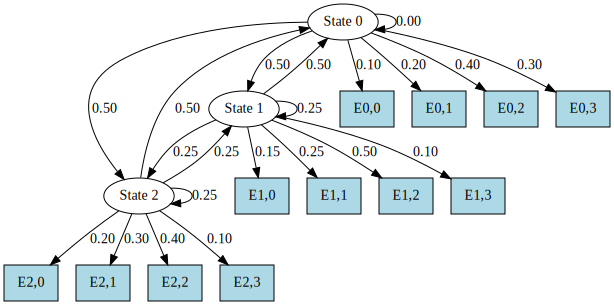

In [21]:
import graphviz
from PIL import Image

def visualize_hmm(model):
    dot = graphviz.Digraph(comment='Hidden Markov Model')

    for i in range(model.n_components):
        dot.node(str(i), f'State {i}')

    for i in range(model.n_components):
        for j in range(model.n_components):
              dot.edge(str(i), str(j), label=f'{model.transmat_[i, j]:.2f}')

    for i in range(model.n_components):
        for j in range(model.n_features):
            dot.node(f'e{i}_{j}', f'E{i},{j}', shape='rectangle', style='filled', fillcolor='lightblue')
            dot.edge(str(i), f'e{i}_{j}', label=f'{model.emissionprob_[i, j]:.2f}')

    return dot


hmm_graph = visualize_hmm(model)
hmm_graph

In [14]:
import math

observations_sequence = np.array([0, 0, 2, 1, 1, 3, 1, 1, 2])
observations_sequence = observations_sequence.reshape(1, -1)

log_probability, hidden_states = model.decode(observations_sequence,
                                              lengths = len(observations_sequence),
                                              algorithm ='viterbi' )


print(math.exp(log_probability), hidden_states)

7.03125000000002e-09 [2 0 1 0 2 0 2 0 1]
